In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.externals import joblib
import os
%matplotlib inline
import re

In [186]:
df = pd.read_csv('~/needledrop/raw-data.csv')

In [ ]:
#plot likes, comments,dislikes, favorites, views, over time
#look at distribution of duration, ratings, genre year over year
#fix ratings info

#regression model, rating ~ likes + views + favorites + duration + genre
#ordered logit model, rating_bucket ~ ...
#decision trees, rating_bucket ~ ...
#svm, rating_bucket ~ ...
#time series, likes/views of video

# Preliminary

In [11]:
df.head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,live_broadcast,longitude,published_at,tags,thumbnail,title,views,rating
2642,NaN,761,hd,Listen: https://www.youtube.com/watch?v=sRjPDy...,74.0,PT5M40S,0,cFanGXSGDWA,NaN,2853.0,none,NaN,2018-05-26T17:14:46.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/cFanGXSGDWA/sddefault.jpg,Lil B - Platinum Flame MIXTAPE REVIEW,114500.0,NaN
2643,NaN,433,hd,Listen: https://www.youtube.com/watch?v=LFBh0I...,45.0,PT16M14S,0,HMIUSLOR350,NaN,1303.0,none,NaN,2018-05-25T21:00:20.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/HMIUSLOR350/sddefault.jpg,Mark Kozelek - Mark Kozelek ALBUM REVIEW,68024.0,7.0
2644,NaN,2101,hd,Listen: https://www.youtube.com/watch?v=k5DHv-...,895.0,PT10M34S,0,m1EiUEIdMr4,NaN,10159.0,none,NaN,2018-05-24T22:09:51.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/m1EiUEIdMr4/sddefault.jpg,Nav's Reckless: NOT GOOD,240839.0,NaN
2645,NaN,848,hd,Listen: https://www.youtube.com/watch?v=l-Bka7...,83.0,PT9M19S,0,4ZZREmYnygU,NaN,4055.0,none,NaN,2018-05-23T17:20:55.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/4ZZREmYnygU/sddefault.jpg,Parquet Courts - Wide Awake! ALBUM REVIEW,131453.0,9.0
2646,NaN,705,hd,Listen: https://www.youtube.com/watch?v=Zkj_NH...,32.0,PT5M39S,0,GO_hwQqCDZo,NaN,1718.0,none,NaN,2018-06-01T18:45:04.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/GO_hwQqCDZo/sddefault.jpg,NIKI - Zephyr ALBUM REVIEW,46940.0,7.0


In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 17 columns):
altitude          1484 non-null float64
comments          2647 non-null int64
definition        2647 non-null object
description       2647 non-null object
dislikes          2646 non-null float64
duration          2647 non-null object
favorites         2647 non-null int64
id                2647 non-null object
latitude          1484 non-null float64
likes             2646 non-null float64
live_broadcast    2647 non-null object
longitude         1484 non-null float64
published_at      2647 non-null object
tags              2647 non-null object
thumbnail         2647 non-null object
title             2647 non-null object
views             2638 non-null float64
dtypes: float64(6), int64(2), object(9)
memory usage: 351.6+ KB


altitude          float64
comments            int64
definition         object
description        object
dislikes          float64
duration           object
favorites           int64
id                 object
latitude          float64
likes             float64
live_broadcast     object
longitude         float64
published_at       object
tags               object
thumbnail          object
title              object
views             float64
dtype: object

In [5]:
df.describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,altitude,comments,dislikes,favorites,latitude,likes,longitude,views
count,1484.0,2647.000000,2646.000000,2647.0,1.484000e+03,2646.000000,1.484000e+03,2.638000e+03
mean,0.0,775.334719,243.115268,0.0,4.160322e+01,2104.977702,-7.308775e+01,1.119944e+05
std,0.0,1094.418634,825.344267,0.0,1.297691e-07,3719.697706,2.259050e-07,1.554478e+05
min,0.0,0.000000,0.000000,0.0,4.160322e+01,33.000000,-7.308775e+01,1.132000e+03
25%,NaN,238.000000,NaN,0.0,NaN,NaN,NaN,NaN
50%,NaN,439.000000,NaN,0.0,NaN,NaN,NaN,NaN
75%,NaN,858.000000,NaN,0.0,NaN,NaN,NaN,NaN
max,0.0,15588.000000,17720.000000,0.0,4.160322e+01,47392.000000,-7.308775e+01,2.431775e+06


In [6]:
df.isnull().sum()

altitude          1163
comments             0
definition           0
description          0
dislikes             1
duration             0
favorites            0
id                   0
latitude          1163
likes                1
live_broadcast       0
longitude         1163
published_at         0
tags                 0
thumbnail            0
title                0
views                9
dtype: int64

In [39]:
df['description'] = df['description'].astype('str')

# Processing

In [73]:
#get rating
df['rating'] = None
df['rating'][df['description'].str.contains('1/10', case=False, na=False)] = 1
df['rating'][df['description'].str.contains('2/10', case=False, na=False)] = 2
df['rating'][df['description'].str.contains('3/10', case=False, na=False)] = 3
df['rating'][df['description'].str.contains('4/10', case=False, na=False)] = 4
df['rating'][df['description'].str.contains('5/10', case=False, na=False)] = 5
df['rating'][df['description'].str.contains('6/10', case=False, na=False)] = 6
df['rating'][df['description'].str.contains('7/10', case=False, na=False)] = 7
df['rating'][df['description'].str.contains('8/10', case=False, na=False)] = 8
df['rating'][df['description'].str.contains('9/10', case=False, na=False)] = 9
df['rating'][df['description'].str.contains('10/10', case=False, na=False)] = 10

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [41]:
df['rating'] = pd.to_numeric(df['rating'])

In [42]:
df['title'][df['rating'].isnull()].head()

2635                             GREAT ALBUMS: April 2018
2636    Weekly Track Roundup: 5/6 (Childish Gambino - ...
2641    Weekly Track Roundup: 5/27 (Drake and Death Gr...
2642                Lil B - Platinum Flame MIXTAPE REVIEW
2644                             Nav's Reckless: NOT GOOD
Name: title, dtype: object

In [43]:
#get album
def test_title(x):
    xx = x.split(' - ')
    if len(xx) > 1:
        return(xx[1])
    
df['album'] = df['title'].apply(test_title)

In [46]:
df['album'] = df.album.str.replace("Review","")
df['album'] = df.album.str.replace("ALBUM REVIEW","")
df['album'] = df.album.str.replace("EP REVIEW","")
df['album'] = df.album.str.replace("EP Review","")
df['album'] = df.album.str.replace("MIXTAPE REVIEW","")
df['album'] = df.album.str.replace("REVIEW","")
df['album'] = df.album.str.replace("QUICKIE","")
df['album'] = df.album.str.replace("ALBUM","")
df['album'] = df.album.str.replace("MIXTAPE","")
df['album'] = df.album.str.replace("COMPILATION","")
df['album'] = df.album.str.replace("TRACK","")
df[df['album'].isnull()].head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,live_broadcast,longitude,published_at,tags,thumbnail,title,views,rating,album
0,0.0,4973,sd,I defend myself against a recent hitjob in The...,614.0,PT21M30S,0,2UZqIIy7pAk,41.603222,35361.0,none,-73.087753,2017-10-07T00:22:24.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/2UZqIIy7pAk/sddefault.jpg,The Fader Response,349152.0,NaN,None
2,0.0,920,hd,Young Thug & Carnage - Young Martha EP\nReview...,125.0,PT7M13S,0,uOJW7JwgA6Q,41.603222,2347.0,none,-73.087753,2017-10-04T17:18:48.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/uOJW7JwgA6Q/sddefault.jpg,GREAT ALBUMS: September 2017,106889.0,NaN,None
5,0.0,1217,hd,The magical monthly segment where I briefly to...,81.0,PT15M43S,0,t3Vdww9zlWY,41.603222,2356.0,none,-73.087753,2017-10-02T15:58:28.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/t3Vdww9zlWY/sddefault.jpg,"YUNOREVIEW: September 2017 (Prophets of Rage, ...",98583.0,NaN,None
6,0.0,680,hd,TND tour dates and tix: http://www.theneedledr...,53.0,PT16M40S,0,B5lZ7M3Qkdk,41.603222,2349.0,none,-73.087753,2017-10-02T01:21:11.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/B5lZ7M3Qkdk/sddefault.jpg,Best & Worst Tracks: 10/1 (Rich The Kid ft. Ke...,138819.0,7.0,None
14,0.0,1273,hd,Today I'm talking about how memetic humor has ...,161.0,PT9M10S,0,dODwQFcIoKE,41.603222,10332.0,none,-73.087753,2017-09-25T17:47:31.000Z,"['album', 'review', 'music', 'reviews', 'indie...",https://i.ytimg.com/vi/dODwQFcIoKE/sddefault.jpg,Memes Are the Future of Music Promotion,194705.0,NaN,None


In [31]:
df.album.head()

0                          None
1                Neō Wax Bloom 
2                          None
3                     Deadstar 
4    Drive It Like It's Stolen 
Name: album, dtype: object

In [138]:
temp = df['title'][df.artist.isnull()].apply(lambda x: x.split('- ')[0])

In [215]:
#get artist

#first string replace on the hyphen to standardize it
def sub_func(x):
    y = re.sub('- ',' - ',str(x))
    return(y)

df['title'] = df.title.apply(sub_func)

#then split on the hyphen
df['artist'] = df['title'].apply(lambda x: x.split(' - ')[0])

df['artist'].head()

0              The Fader Response
1                     Iglooghost 
2    GREAT ALBUMS: September 2017
3                     Smokepurpp 
4                 Injury Reserve 
Name: artist, dtype: object

In [52]:
#get genre
df['electronic'] = 0
df['electronic'][df['tags'].str.contains('electronic', case=False, na=False)] = 1
df['hip_hop'] = 0
df['hip_hop'][df['tags'].str.contains('hip hop', case=False, na=False)] = 1
df['metal'] = 0
df['metal'][df['tags'].str.contains('metal', case=False, na=False)] = 1
df['folk'] = 0
df['folk'][df['tags'].str.contains('folk', case=False, na=False)] = 1
df['indie'] = 0
df['indie'][df['tags'].str.contains('indie', case=False, na=False)] = 1
df['underground'] = 0
df['underground'][df['tags'].str.contains('underground', case=False, na=False)] = 1
df['experimental'] = 0
df['experimental'][df['tags'].str.contains('experimental', case=False, na=False)] = 1
df['instrumental'] = 0
df['instrumental'][df['tags'].str.contains('instrumental', case=False, na=False)] = 1
df['rock'] = 0
df['rock'][df['tags'].str.contains('rock', case=False, na=False)] = 1
df['rap'] = 0
df['rap'][df['tags'].str.contains('rap', case=False, na=False)] = 1
df['jazz'] = 0
df['jazz'][df['tags'].str.contains('jazz', case=False, na=False)] = 1

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [58]:
df.artist[df.hip_hop==1].head()

1                      Iglooghost
2    GREAT ALBUMS: September 2017
3                      Smokepurpp
4                  Injury Reserve
8            Young Thug & Carnage
Name: artist, dtype: object

In [88]:
df.iloc[1].description

"Listen: https://www.youtube.com/watch?v=6m5du_V0_UI&ab_channel=Brainfeedermedia\n\nIglooghost makes his full-length Brainfeeder debut with the impressive and fantastical Neō Wax Bloom.\n\nBuy this album: http://amzn.to/2xl8Iha\n\nMore electronic reviews: https://www.youtube.com/playlist?list=PLP4CSgl7K7ormX2pL9h0inES2Ub630NoL\n\n===================================\nSubscribe: http://bit.ly/1pBqGCN\n\nOfficial site: http://theneedledrop.com\n\nTND Twitter: http://twitter.com/theneedledrop\n\nTND Facebook: http://facebook.com/theneedledrop\n\nSupport TND: http://theneedledrop.com/support\n===================================\n\nFAV TRACKS: SUPER INK BURST, BUG THIEF, SOLAR BLADE, WHITE GUM, GOD GRID, ZEN CHAMP\n\nLEAST FAV TRACK: PEANUT CHOKER\n\nIGLOOGHOST - NEO WAX BLOOM / 2017 / BRAINFEEDER / WONKY, UK BASS, GLITCH HOP, DRILL AND BASS\n\n8/10 http://www.theneedledrop.com/loved-list/2017/1/loved-list-2017\n\nY'all know this is just my opinion, right?"

In [60]:
#missing ratings
#these are a mixture of track reviews, classic reviews, xx/10, etc.
missingratings = df[df.rating.isnull()&df['title'].str.contains('ALBUM REVIEW', case=False, na=False)][['id','title','artist','album','rating','description']]
missingratings.head()
len(missingratings)
len(missingratings)/len(df)

,id,title,artist,album,rating,description
88,jp0Z2IDfvOo,Toro y Moi - Boo Boo ALBUM REVIEW,Toro y Moi,Boo Boo,NaN,Listen: https://www.youtube.com/watch?v=huA5-V...
99,320eVDw8UGM,Calvin Harris - Funk Wav Bounces Vol. 1 ALBUM ...,Calvin Harris,Funk Wav Bounces Vol. 1,NaN,Listen: https://www.youtube.com/watch?v=ozv4q2...
104,pejfwSOez5w,Portugal. The Man - Woodstock ALBUM REVIEW,Portugal. The Man,Woodstock,NaN,Listen: https://www.youtube.com/watch?v=1Dvvoh...
105,Kum_z3Mvh8k,DJ Khaled - Grateful ALBUM REVIEW,DJ Khaled,Grateful,NaN,Listen: https://www.youtube.com/watch?v=weeI1G...
110,H7Jh2STd06A,2 Chainz - Pretty Girls Like Trap Music ALBUM ...,2 Chainz,Pretty Girls Like Trap Music,NaN,Listen: https://www.youtube.com/watch?v=TyylUe...


In [63]:
#one-off fixes
##fix planningtorock dup
df = df[df.id!='l7ovkjrJFMI']
##fix plastic beach rating
df.rating[df.id=='A9RLE74OXUY'] = 7

In [64]:
#investigate missing ones manually
temp = df[df.rating.isnull()&df['title'].str.contains('ALBUM REVIEW', case=False, na=False)][['id','title','artist','album','rating','description']]
temp.to_csv("~/Desktop/temp.csv")

In [65]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [66]:
#dates
df['year'] = df.published_at.dt.year
df['month'] = df.published_at.dt.month
df['dow'] = df.published_at.dt.dayofweek
df['week'] = df.published_at.dt.week

In [67]:
df.month.tail()

2642    5
2643    5
2644    5
2645    5
2646    6
Name: month, dtype: int64

In [68]:
df[['year', 'month', 'dow','week']] = df[['year', 'month', 'dow','week']].apply(lambda x: x.astype('category'))

In [69]:
df[['electronic', 'hip_hop', 'metal','folk',
   'indie','underground','experimental',
   'instrumental','rock','rap','jazz']] = df[['electronic', 'hip_hop', 'metal','folk',
   'indie','underground','experimental',
   'instrumental','rock','rap','jazz']].apply(lambda x: x.astype('category'))

In [76]:
df['rating_bucket'] = df['rating'].astype('str')
df['rating_bucket'][df.rating.isin([1,2,3])] = "1-3"

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


# EDA

In [95]:
df.columns

Index(['altitude', 'comments', 'definition', 'description', 'dislikes',
       'duration', 'favorites', 'id', 'latitude', 'likes', 'live_broadcast',
       'longitude', 'published_at', 'tags', 'thumbnail', 'title', 'views',
       'rating', 'album', 'artist', 'genre', 'electronic', 'hip_hop', 'metal',
       'folk', 'indie', 'underground', 'experimental', 'instrumental', 'rock',
       'rap', 'jazz'],
      dtype='object')

In [100]:
df.rating.isnull().sum()/len(df.rating)

0.3296204620462046

In [81]:
#take only vids with ratings
df1 = df
#df1 = df[df.rating.notnull()]

In [82]:
df1.head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,...,experimental,instrumental,rock,rap,jazz,year,month,dow,week,rating_bucket
0,0.0,4973,sd,I defend myself against a recent hitjob in The...,614.0,PT21M30S,0,2UZqIIy7pAk,41.603222,35361.0,...,0,0,0,0,0,2017,10,5,40,None
1,0.0,976,hd,Listen: https://www.youtube.com/watch?v=6m5du_...,59.0,PT6M8S,0,datrlt_DGLs,41.603222,2261.0,...,0,0,0,0,0,2017,10,3,40,8
2,0.0,920,hd,Young Thug & Carnage - Young Martha EP\nReview...,125.0,PT7M13S,0,uOJW7JwgA6Q,41.603222,2347.0,...,0,0,1,1,0,2017,10,2,40,None
3,0.0,1344,hd,Listen: https://www.youtube.com/watch?v=OL9b_U...,265.0,PT8M11S,0,Uxmi5AcAFgg,41.603222,4119.0,...,0,0,0,1,0,2017,10,1,40,6
4,0.0,853,hd,Listen: http://www.theneedledrop.com/articles/...,74.0,PT6M27S,0,lI6-C7dwz9k,41.603222,2069.0,...,0,0,0,1,0,2017,10,1,40,7


In [83]:
df1['published_at'] = pd.to_datetime(df1['published_at'])

In [84]:
ts = df1.set_index('published_at')

In [85]:
ts.head()

,altitude,comments,definition,description,dislikes,duration,favorites,id,latitude,likes,...,experimental,instrumental,rock,rap,jazz,year,month,dow,week,rating_bucket
published_at,,,,,,,,,,,,,,,,,,,,,
2017-10-07 00:22:24,0.0,4973,sd,I defend myself against a recent hitjob in The...,614.0,PT21M30S,0,2UZqIIy7pAk,41.603222,35361.0,...,0,0,0,0,0,2017,10,5,40,None
2017-10-05 21:42:35,0.0,976,hd,Listen: https://www.youtube.com/watch?v=6m5du_...,59.0,PT6M8S,0,datrlt_DGLs,41.603222,2261.0,...,0,0,0,0,0,2017,10,3,40,8
2017-10-04 17:18:48,0.0,920,hd,Young Thug & Carnage - Young Martha EP\nReview...,125.0,PT7M13S,0,uOJW7JwgA6Q,41.603222,2347.0,...,0,0,1,1,0,2017,10,2,40,None
2017-10-03 21:15:24,0.0,1344,hd,Listen: https://www.youtube.com/watch?v=OL9b_U...,265.0,PT8M11S,0,Uxmi5AcAFgg,41.603222,4119.0,...,0,0,0,1,0,2017,10,1,40,6
2017-10-03 16:26:21,0.0,853,hd,Listen: http://www.theneedledrop.com/articles/...,74.0,PT6M27S,0,lI6-C7dwz9k,41.603222,2069.0,...,0,0,0,1,0,2017,10,1,40,7


In [86]:
ts.groupby(ts.index.year).sum()['views']

2009      393429.0
2010     7384216.0
2011    19660725.0
2012    23667691.0
2013    25913043.0
2014    29049346.0
2015    45935446.0
2016    58939020.0
2017    63445150.0
2018    21015705.0
Name: views, dtype: float64

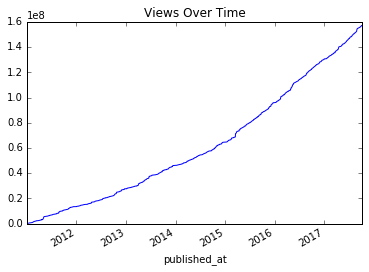

In [140]:
ts.sort_index()['views']['2011':'2017'].cumsum().plot(title='Views Over Time')

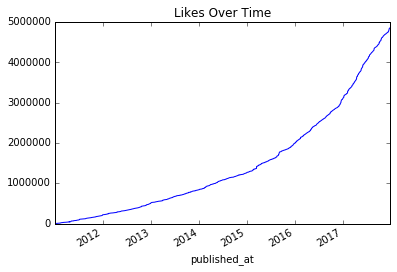

In [88]:
ts.sort_index()['likes']['2011':'2017'].cumsum().plot(title='Likes Over Time')

In [101]:
temp = df1[df1.published_at.dt.year==2017]

In [99]:
temp = temp[['published_at','rating']]

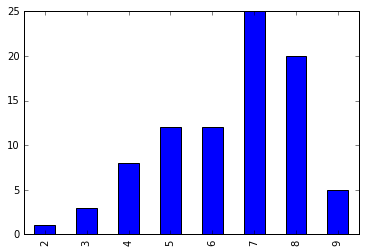

In [100]:
temp.rating.value_counts(sort=False).plot.bar()

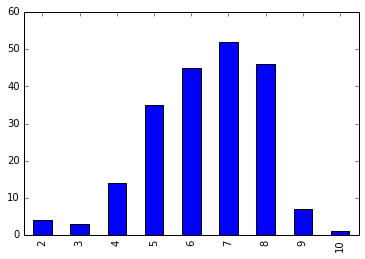

In [102]:
df1[df1.published_at.dt.year==2017][['published_at','rating']].rating.value_counts(sort=False).plot.bar()

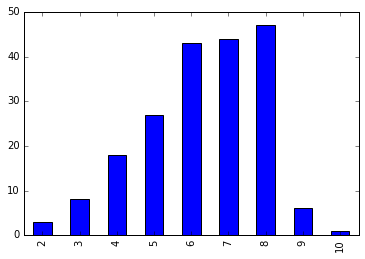

In [103]:
df1[df1.published_at.dt.year==2016][['published_at','rating']].rating.value_counts(sort=False).plot.bar()

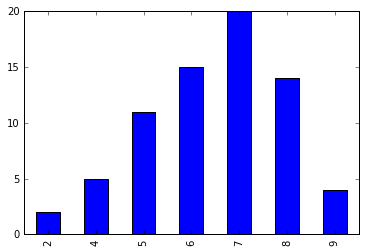

In [109]:
#see if the distribution this year so far vs last year
df1[(df1['published_at'] > '2017-01-01') & (df1['published_at'] < '2017-05-31')][['published_at','rating']].rating.value_counts(sort=False).plot.bar()

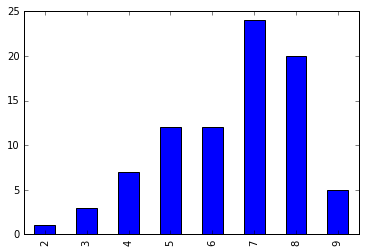

In [110]:
#see if the distribution this year so far vs last year
df1[(df1['published_at'] > '2018-01-01') & (df1['published_at'] < '2018-05-31')][['published_at','rating']].rating.value_counts(sort=False).plot.bar()

In [116]:
pd.to_numeric(df1.rating).head()

0    NaN
1    8.0
2    NaN
3    6.0
4    7.0
Name: rating, dtype: float64

In [122]:
#difference in average rating b/w years
pd.to_numeric(df1[(df1['published_at'] > '2018-01-01') & (df1['published_at'] < '2018-06-01')][['published_at','rating']].rating).mean()-pd.to_numeric(df1[(df1['published_at'] > '2017-01-01') & (df1['published_at'] < '2017-06-01')][['published_at','rating']].rating).mean()

0.010439105219552935

In [126]:
df1['year'] = df1.published_at.dt.year
df1['rating'] = pd.to_numeric(df1['rating'])

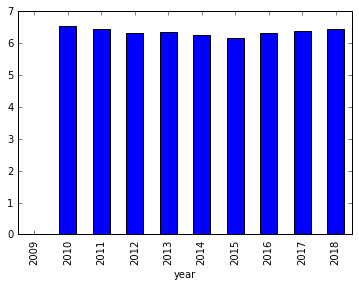

In [127]:
df1.groupby(df1.year)['rating'].mean().plot.bar()

In [128]:
df1.groupby(df1.year)['rating'].var()

year
2009         NaN
2010    2.598747
2011    2.555300
2012    2.570961
2013    2.271735
2014    2.433708
2015    2.485127
2016    2.561794
2017    2.258759
2018    2.580164
Name: rating, dtype: float64

In [129]:
df1[df1.rating==10].groupby(df1.year)['year'].count()

year
2010    3
2012    1
2014    1
2015    1
2016    1
2017    1
Name: year, dtype: int64

In [136]:
df1[df1.id=='mK54P7VeM1g'].title

1835    Death Grips- The Money Store ALBUM REVIEW
Name: title, dtype: object

In [130]:
df1[(df1.rating==10)&(df1.album.notnull())][['year','title','artist','album']]

,year,title,artist,album
895,2015,Kendrick Lamar - To Pimp A Butterfly ALBUM REVIEW,Kendrick Lamar,To Pimp A Butterfly
1144,2014,Swans - To Be Kind ALBUM REVIEW,Swans,To Be Kind


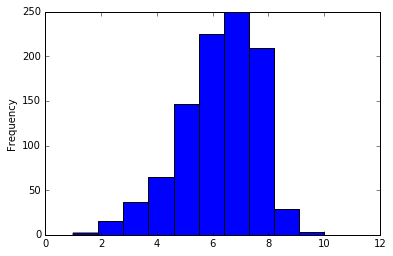

In [59]:
data.rating.plot(kind='hist')

# Model Building

In [19]:
data = df[df.rating.notnull()&df.album.notnull()&df.artist.notnull()]

In [28]:
regModel = linear_model.LinearRegression()

In [69]:
data[['comments','likes','dislikes','favorites','rating']].dtypes

comments       int64
likes        float64
dislikes     float64
favorites      int64
rating       float64
dtype: object

In [29]:
regModel.fit(data[['comments','likes','dislikes','favorites','views',
                   'electronic','hip_hop','metal','folk','indie','underground',
                   'experimental','instrumental','rock','rap','jazz',
                   'month','year','month','dow','week']], data[['rating']])

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
regModel.intercept_

array([ 6.42172187])

In [30]:
regModel.coef_

array([[ -5.95622958e-04,   1.57705807e-04,  -4.42450974e-04,
         -1.24471611e-16,   2.37698261e-06,  -8.10137008e-02,
         -1.73622612e-01,   4.35801965e-01,   2.78567336e-01,
          1.91601202e-01,  -1.47298034e+00,   6.27319000e-01,
         -8.50546344e-02,   9.24102731e-03,   5.93588812e-02,
          1.75779985e-01,   7.09477190e-02,  -5.66831236e-03,
          7.09477190e-02,  -1.07911503e-02,  -3.37036258e-02]])

In [31]:
regModel.score(data[['comments','likes','dislikes','favorites','views',
                   'electronic','hip_hop','metal','folk','indie','underground',
                   'experimental','instrumental','rock','rap','jazz',
                   'month','year','month','dow','week']], data[['rating']])

0.19424983292911047

In [76]:
data['pred'] = regModel.predict(data[['comments','likes','dislikes','favorites']])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [77]:
data[['rating','pred']].head()

,rating,pred
1,8.0,6.472785
3,6.0,6.608160
4,7.0,6.474337
7,6.0,6.534127
8,8.0,6.691115


In [78]:
data.rating.describe()

count    981.000000
mean       6.313965
std        1.541037
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: rating, dtype: float64

In [79]:
data.rating.value_counts()

7.0     249
6.0     225
8.0     209
5.0     147
4.0      65
3.0      37
9.0      29
2.0      15
10.0      3
1.0       2
Name: rating, dtype: int64

In [36]:
data['rating_bucket'] = data['rating'].astype('str')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
data['rating_bucket'][data.rating.isin([1,2,3])] = "1-3"

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [99]:
data.rating_bucket.value_counts()

7.0     249
6.0     225
8.0     209
5.0     147
4.0      65
1-3      54
9.0      29
10.0      3
Name: rating_bucket, dtype: int64

In [44]:
data.rating_bucket = data.rating_bucket.astype('category')

/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
data['rating_bucket'].cat.reorder_categories(['1-3','4.0','5.0','6.0','7.0','8.0','9.0','10.0'], inplace=True)

In [48]:
multReg = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [49]:
multReg.fit(data[['comments','likes','dislikes','favorites','views',
                   'electronic','hip_hop','metal','folk','indie','underground',
                   'experimental','instrumental','rock','rap','jazz',
                   'month','year','month','dow','week']], data[['rating']])

/usr/local/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
len(data[['comments','likes','dislikes','favorites','views',
                   'electronic','hip_hop','metal','folk','indie','underground',
                   'experimental','instrumental','rock','rap','jazz',
                   'month','year','month','dow','week']].columns)

21

In [50]:
multReg.coef_

array([[  3.33618679e-04,  -4.37437761e-04,   1.11940400e-02,
          0.00000000e+00,  -4.14176230e-06,  -2.49811225e-05,
          4.20941224e-05,  -1.90674401e-05,  -1.39150746e-05,
          1.78756903e-05,   1.80224204e-05,  -3.48306142e-05,
         -2.30222617e-06,   2.58053323e-04,  -1.42656920e-04,
         -2.92050948e-05,   5.95945870e-04,  -1.75220895e-03,
          5.95945870e-04,   2.59025655e-04,   2.61128663e-03],
       [  1.12507024e-04,  -4.48514091e-05,   1.20365262e-02,
          0.00000000e+00,  -1.73050359e-05,  -1.52378766e-04,
          1.92880594e-05,  -2.66861421e-04,  -1.71354398e-04,
          2.52568009e-06,   4.83160619e-06,   1.15855964e-04,
         -2.89133464e-05,  -3.45659708e-04,   3.18267386e-04,
         -1.70991763e-04,   5.52737353e-04,  -2.16410717e-04,
          5.52737353e-04,   3.48257437e-04,   4.31987864e-03],
       [  7.43510529e-06,  -3.58790572e-04,   1.19798737e-02,
          0.00000000e+00,  -9.33316532e-06,   3.94258300e-04,
      

In [51]:
data['pred'] = multReg.predict(data[['comments','likes','dislikes','favorites','views',
                   'electronic','hip_hop','metal','folk','indie','underground',
                   'experimental','instrumental','rock','rap','jazz',
                   'month','year','month','dow','week']])

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [56]:
data[['rating_bucket','pred']].head(15)

,rating_bucket,pred
1,8.0,7.0
3,6.0,7.0
4,7.0,7.0
7,6.0,7.0
8,8.0,8.0
9,6.0,7.0
10,7.0,7.0
11,1-3,7.0
12,5.0,6.0
13,8.0,8.0


In [60]:
os.getcwd()

'/Users/byronking/needledrop'

In [61]:
#save weights
filename = 'multreg-weights.sav'
joblib.dump(multReg, filename)

['multreg-weights.sav']

In [62]:
temp = pd.read_csv('~/needledrop/raw-data.csv')

In [65]:
temp.head().id.unique()

array(['2UZqIIy7pAk', 'datrlt_DGLs', 'uOJW7JwgA6Q', 'Uxmi5AcAFgg',
       'lI6-C7dwz9k'], dtype=object)